In [1]:
# Imports
from __future__ import print_function
import numpy as np
from IPython.display import Image
import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.models import Sequential
from keras.layers.core import Activation
from IPython.display import clear_output

Using TensorFlow backend.


In [2]:
# Load Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Shape of training data", X_train.shape)
print("Shape of labels", y_train.shape)

Shape of training data (60000, 28, 28)
Shape of labels (60000,)


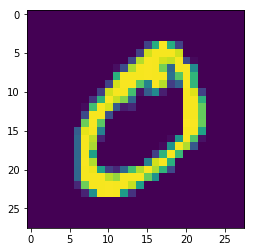

In [3]:
# Visualize Data
plt.imshow(X_train[1])
plt.show()

In [4]:
# Convert y into categorical f
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
y_test[1:10,:]

array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [5]:
# Data Normalization
X_train = X_train / 255.
X_test = X_test / 255.

In [6]:
# Data reshape for keras format
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

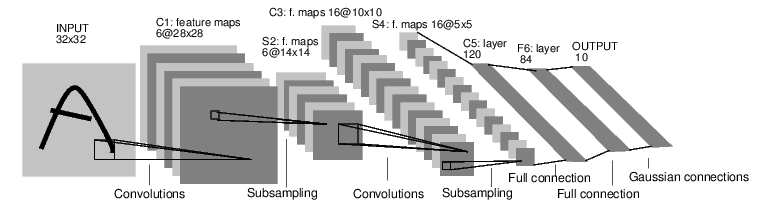

In [7]:
# LeNet Model
Image("lenet5.png")

In [8]:
# Model Definition -- ReLu has been used, that was not in original implementation
# INPUT => CONV => RELU => POOL => CONV => RELU => POOL => FC => RELU => FC
model = Sequential()
model.add(Conv2D(6, kernel_size=3, strides=1, padding='same', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Activation("relu"))
model.add(Conv2D(16, kernel_size=5, strides=1, padding='valid'))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(120))
model.add(Activation("relu"))
model.add(Dense(84))
model.add(Dense(10, activation='softmax'))

In [9]:
# Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         60        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
__________

In [10]:
# Plot Loss in real time -- Ref [stared]

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

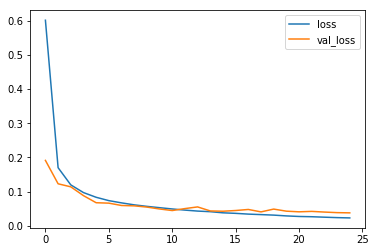

60000/60000 [==============================] - 2s - loss: 0.0229 - acc: 0.9929 - val_loss: 0.0377 - val_acc: 0.9879


In [11]:
# Train Model with sgd
model.compile('sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=64, epochs=25, validation_data=[X_test, y_test], callbacks=[plot_losses])

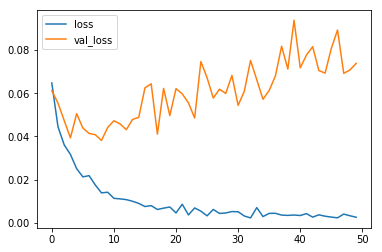

60000/60000 [==============================] - 2s - loss: 0.0027 - acc: 0.9993 - val_loss: 0.0738 - val_acc: 0.9883


In [12]:
# Train Model with adam -- Adam works much better (please note the scale on y-axis are differentlenet.save('myletnet.h5'))
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=[X_test, y_test], callbacks=[plot_losses])

In [13]:
model.save('letnet.h5')

In [14]:
test_cases = 5
y_pred = model.predict(X_test[0:test_cases,:])
prediction = y_pred.argmax(axis=1)
print("Ground Truth Label", np.argmax(y_test[0:test_cases], axis =1), "\nPredicted Label", prediction[0:test_cases])

Ground Truth Label [7 2 1 0 4] 
Predicted Label [7 2 1 0 4]
